In [2]:
library(phyloseq)
library(ggplot2)
library(vegan)
library(readr)
library(data.table)
library(dplyr)
library(stats)
library(ggpubr)
library(dunn.test)

In [1]:
#5krare
cadaver = readRDS("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/RDSfiles/all_cohorts_cadaver_5krare.rds")

#otu.5k = data.frame(otu_table(cadaver))
#meta.5k = data.frame(sample_data(cadaver))


In [4]:
#Read in/out to format for ANCOM
otu.5k = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/CSVfiles/5k_otu.csv")
meta.5k = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/CSVfiles/5k_meta.csv")

#### ANCOM with Covariates

In [5]:
meta.5k$The_manner_of_death = as.character(meta.5k$The_manner_of_death)
meta.5k$The_manner_of_death[which(meta.5k$The_manner_of_death == "Accident_road traffic accident")] = "Accident"
meta.5k$The_manner_of_death[which(meta.5k$The_manner_of_death == "Accident_Road traffic accident")] = "Accident"
meta.5k$The_manner_of_death[which(meta.5k$The_manner_of_death == "Natural death")] = "Natural"
meta.5k$The_manner_of_death[which(meta.5k$The_manner_of_death == "Undetermined")] = "Natural"
head(as.factor(meta.5k$The_manner_of_death))

[1] Natural  Natural  Natural  Natural  Natural  Accident
Levels: Accident Homicide Natural Suicide

##### MOD: Accident w all organs

In [6]:
accident = meta.5k %>%
mutate(Single_MOD = The_manner_of_death)

accident$Single_MOD = as.character(accident$Single_MOD)
accident$Single_MOD[which(accident$The_manner_of_death != "Accident")] = "Other"
accident$Single_MOD = as.factor(accident$Single_MOD)
head(accident$Single_MOD)

[1] Other    Other    Other    Other    Other    Accident
Levels: Accident Other

In [9]:
#RUN ANCOM
#variable "Organ" takes values Liver and Other

comparison_test=ANCOM.main(OTUdat=otu.5k,
                           Vardat=accident,
                           adjusted=TRUE,
                           repeated=F,
                           main.var="Single_MOD",
                           adj.formula="Location+Sex+Age+Ethnicity+PMI+bmi_category+Organ", #covariates
                           repeat.var=NULL,
                           longitudinal=FALSE,
                           random.formula=NULL,
                           multcorr=2, #2 corresponds to BH FDR correction
                           sig=0.05,
                           prev.cut=0.90)

accident.allorgan.ancom = comparison_test$W.taxa
head(accident.allorgan.ancom)

,otu.names,W_stat,detected_0.9,detected_0.8,detected_0.7,detected_0.6
33,TACGTAGGTGGCAAGCGTTGTCCGGATTTATTGGGCGTAAAGCGAGCGCAGGCGGTTTCTTAAGTCTGATGTGAAAGCCTTCGGCTCAACCGAAGAAGTGCATCGGAAACTGGGAAACTTGAGTGCAGAAGAGGACAGTGGAACTCCATG,128,TRUE,TRUE,TRUE,TRUE
77,TACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTTTGTTAAGTCAGATGTGAAATCCCCGCGCTTAACGTGGGAACTGCATTTGAAACTGGCAAGCTAGAGTCTTGTAGAGGGGGGTAGAATTCCAGG,128,TRUE,TRUE,TRUE,TRUE
18,TACGTAGGTGGCGAGCGTTATCCGGATTTACTGGGCGTAAAGGGAGCGTAGGCGGATGATTAAGTGGGATGTGAAATACCCGGGCTCAACTTGGGTGCTGCATTCCAAACTGGTTATCTAGAGTGCAGGAGAGGAGAGTGGAATTCCTAG,107,FALSE,FALSE,TRUE,TRUE
42,TACGTAGGTCCCGAGCGTTGTCCGGATTTATTGGGCGTAAAGCGAGCGCAGGTGGTTTATTAAGTCTGGTGTAAAAGGCAGTGGCTCAACCATTGTATGCATTGGAAACTGGTAGACTTGAGTGCAGGAGAGGAGAGTGGAATTCCATGT,93,FALSE,FALSE,FALSE,TRUE
120,TACGGAGGGTGCAAGCGTTATCCGGATTCACTGGGTTTAAAGGGTGCGTAGGCGGGCAGGTAAGTCAGTGGTGAAATCCTGGAGCTTAACTCCAGAACTGCCATTGATACTATCTGTCTTGAATATTGTGGAGGTAAGCGGAATATGTCA,77,FALSE,FALSE,FALSE,FALSE
55,GACGTAGGATGCAAGCGTTGTCCGGATTTATTGGGCGTAAAGAGTTCGTAGGTGGTTTGTTAAGTTTGGTGTTAAAGATTGGGGCTCAACCCTGAAACTGCACTGAATACTGGCAGACTCGAGTGTGGTAGAGGCTAGTGGAATTCCCAG,76,FALSE,FALSE,FALSE,FALSE


In [10]:
write.csv(accident.allorgan.ancom, "/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/ANCOM/MOD.accident.allorgan.ancom_cov_organ.csv")

##### Natural w all organs

In [11]:
natural = meta.5k %>%
mutate(Single_MOD = The_manner_of_death)

natural$Single_MOD = as.character(natural$Single_MOD)
natural$Single_MOD[which(natural$The_manner_of_death != "Natural")] = "Other"
natural$Single_MOD = as.factor(natural$Single_MOD)
head(natural$Single_MOD)

[1] Natural Natural Natural Natural Natural Other  
Levels: Natural Other

In [12]:
#RUN ANCOM

comparison_test=ANCOM.main(OTUdat=otu.5k,
                           Vardat=natural,
                           adjusted=TRUE,
                           repeated=F,
                           main.var="Single_MOD",
                           adj.formula="Location+Sex+Age+Ethnicity+PMI+bmi_category+Organ", #covariates
                           repeat.var=NULL,
                           longitudinal=FALSE,
                           random.formula=NULL,
                           multcorr=2, #2 corresponds to BH FDR correction
                           sig=0.05,
                           prev.cut=0.90)

natural.allorgan.ancom = comparison_test$W.taxa

write.csv(natural.allorgan.ancom, "/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/ANCOM/MOD.natural.allorgan.ancom_cov_organ.csv")


##### Homicide w all organs

In [13]:
homicide = meta.5k %>%
mutate(Single_MOD = The_manner_of_death)

homicide$Single_MOD = as.character(homicide$Single_MOD)
homicide$Single_MOD[which(homicide$The_manner_of_death != "Homicide")] = "Other"
homicide$Single_MOD = as.factor(homicide$Single_MOD)
head(homicide$Single_MOD)

[1] Other Other Other Other Other Other
Levels: Homicide Other

In [14]:
#RUN ANCOM

comparison_test=ANCOM.main(OTUdat=otu.5k,
                           Vardat=homicide,
                           adjusted=TRUE,
                           repeated=F,
                           main.var="Single_MOD",
                           adj.formula="Location+Sex+Age+Ethnicity+PMI+bmi_category+Organ", #covariates
                           repeat.var=NULL,
                           longitudinal=FALSE,
                           random.formula=NULL,
                           multcorr=2, #2 corresponds to BH FDR correction
                           sig=0.05,
                           prev.cut=0.90)

homicide.allorgan.ancom = comparison_test$W.taxa

write.csv(homicide.allorgan.ancom, "/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/ANCOM/MOD.homicide.allorgan.ancom_cov_organ.csv")


##### Suicide w all organs

In [15]:
suicide = meta.5k %>%
mutate(Single_MOD = The_manner_of_death)

suicide$Single_MOD = as.character(suicide$Single_MOD)
suicide$Single_MOD[which(suicide$The_manner_of_death != "Suicide")] = "Other"
suicide$Single_MOD = as.factor(suicide$Single_MOD)
head(suicide$Single_MOD)

[1] Other Other Other Other Other Other
Levels: Other Suicide

In [16]:
#RUN ANCOM

comparison_test=ANCOM.main(OTUdat=otu.5k,
                           Vardat=suicide,
                           adjusted=TRUE,
                           repeated=F,
                           main.var="Single_MOD",
                           adj.formula="Location+Sex+Age+Ethnicity+PMI+bmi_category+Organ", #covariates
                           repeat.var=NULL,
                           longitudinal=FALSE,
                           random.formula=NULL,
                           multcorr=2, #2 corresponds to BH FDR correction
                           sig=0.05,
                           prev.cut=0.90)

suicide.allorgan.ancom = comparison_test$W.taxa

write.csv(suicide.allorgan.ancom, "/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/ANCOM/MOD.suicide.allorgan.ancom_cov_organ.csv")


### Run DeSEQ to get log2fold change values for ancom-identified OTUs

In [23]:
library(DESeq2)

In [25]:
#Read metadata in/out to convert to mapfile for new ps object (retaining Single_MOD column)
#write.csv(natural, "/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/DESEQ/natural.meta.csv")
#write.csv(accident, "/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/DESEQ/accident.meta.csv")
#write.csv(homicide, "/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/DESEQ/homicide.meta.csv")
#write.csv(suicide, "/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/DESEQ/suicide.meta.csv")

natural.map = import_qiime_sample_data("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/DESEQ/natural.meta.txt")
accident.map = import_qiime_sample_data("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/DESEQ/accident.meta.txt")
homicide.map = import_qiime_sample_data("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/DESEQ/homicide.meta.txt")
suicide.map = import_qiime_sample_data("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/DESEQ/suicide.meta.txt")

#create new ps objects 

tree = phy_tree(cadaver)
otu = otu_table(cadaver)
tax = tax_table(cadaver)

natural.ps = merge_phyloseq(natural.map, tree, otu, tax)
accident.ps = merge_phyloseq(accident.map, tree, otu, tax)
homicide.ps = merge_phyloseq(homicide.map, tree, otu, tax)
suicide.ps = merge_phyloseq(suicide.map, tree, otu, tax)


In [28]:
#convert ps to deseq object

natural_dds = phyloseq_to_deseq2(natural.ps, ~Single_MOD)
accident_dds = phyloseq_to_deseq2(accident.ps, ~Single_MOD)
homicide_dds = phyloseq_to_deseq2(homicide.ps, ~Single_MOD)
suicide_dds = phyloseq_to_deseq2(suicide.ps, ~Single_MOD)

converting counts to integer mode
converting counts to integer mode
converting counts to integer mode
converting counts to integer mode


In [30]:
#Run DESeq - natural 5k rarefied

gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}

geoMeans = apply(DESeq2::counts(natural_dds), 1, gm_mean)


natural_dds = estimateSizeFactors(natural_dds, geoMeans = geoMeans)
natural_dds = estimateDispersions(natural_dds)
abund = getVarianceStabilizedData(natural_dds)

natural_dds = DESeq(natural_dds, test="Wald", fitType="parametric")

res = results(natural_dds)
res.tax = cbind(as(res, "data.frame"), as(tax_table(natural.ps)[rownames(res), ], "matrix"))

#don't ned significance values, just want log2fold change
#alpha = 0.05
#sigtab = res[which(res$padj < alpha), ]
#sigtab = cbind(as(sigtab, "data.frame"), as(tax_table(natural_pc)[rownames(sigtab), ], "matrix"))

write.csv(res.tax, file="/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/DESEQ/natural.deseq.log2fold.csv")


found already estimated dispersions, replacing these
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
using pre-existing size factors
estimating dispersions
found already estimated dispersions, replacing these
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 503 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


In [31]:
#Run DESeq - accident 5k rarefied

gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}

geoMeans = apply(DESeq2::counts(accident_dds), 1, gm_mean)


accident_dds = estimateSizeFactors(accident_dds, geoMeans = geoMeans)
accident_dds = estimateDispersions(accident_dds)
abund = getVarianceStabilizedData(accident_dds)

accident_dds = DESeq(accident_dds, test="Wald", fitType="parametric")

res = results(accident_dds)
res.tax = cbind(as(res, "data.frame"), as(tax_table(accident.ps)[rownames(res), ], "matrix"))

#don't ned significance values, just want log2fold change
#alpha = 0.05
#sigtab = res[which(res$padj < alpha), ]
#sigtab = cbind(as(sigtab, "data.frame"), as(tax_table(accident_pc)[rownames(sigtab), ], "matrix"))

write.csv(res.tax, file="/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/DESEQ/accident.deseq.log2fold.csv")


gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
using pre-existing size factors
estimating dispersions
found already estimated dispersions, replacing these
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 525 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


In [32]:
#Run DESeq - homicide 5k rarefied

gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}

geoMeans = apply(DESeq2::counts(homicide_dds), 1, gm_mean)


homicide_dds = estimateSizeFactors(homicide_dds, geoMeans = geoMeans)
homicide_dds = estimateDispersions(homicide_dds)
abund = getVarianceStabilizedData(homicide_dds)

homicide_dds = DESeq(homicide_dds, test="Wald", fitType="parametric")

res = results(homicide_dds)
res.tax = cbind(as(res, "data.frame"), as(tax_table(homicide.ps)[rownames(res), ], "matrix"))

#don't ned significance values, just want log2fold change
#alpha = 0.05
#sigtab = res[which(res$padj < alpha), ]
#sigtab = cbind(as(sigtab, "data.frame"), as(tax_table(homicide_pc)[rownames(sigtab), ], "matrix"))

write.csv(res.tax, file="/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/DESEQ/homicide.deseq.log2fold.csv")


gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
using pre-existing size factors
estimating dispersions
found already estimated dispersions, replacing these
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 487 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


In [33]:
#Run DESeq - suicide 5k rarefied

gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}

geoMeans = apply(DESeq2::counts(suicide_dds), 1, gm_mean)


suicide_dds = estimateSizeFactors(suicide_dds, geoMeans = geoMeans)
suicide_dds = estimateDispersions(suicide_dds)
abund = getVarianceStabilizedData(suicide_dds)

suicide_dds = DESeq(suicide_dds, test="Wald", fitType="parametric")

res = results(suicide_dds)
res.tax = cbind(as(res, "data.frame"), as(tax_table(suicide.ps)[rownames(res), ], "matrix"))

#don't ned significance values, just want log2fold change
#alpha = 0.05
#sigtab = res[which(res$padj < alpha), ]
#sigtab = cbind(as(sigtab, "data.frame"), as(tax_table(suicide_pc)[rownames(sigtab), ], "matrix"))

write.csv(res.tax, file="/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/DESEQ/suicide.deseq.log2fold.csv")


gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
using pre-existing size factors
estimating dispersions
found already estimated dispersions, replacing these
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 511 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


#### Plot log2Fold change values of ANCOM results

In [6]:
ancom_0.60.mod = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/ANCOM/MOD.allorgan.ancom_0.60.tax.summary.csv")
ancom_0.70.mod = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/ANCOM/MOD.allorgan.ancom_0.70.tax.summary.csv")



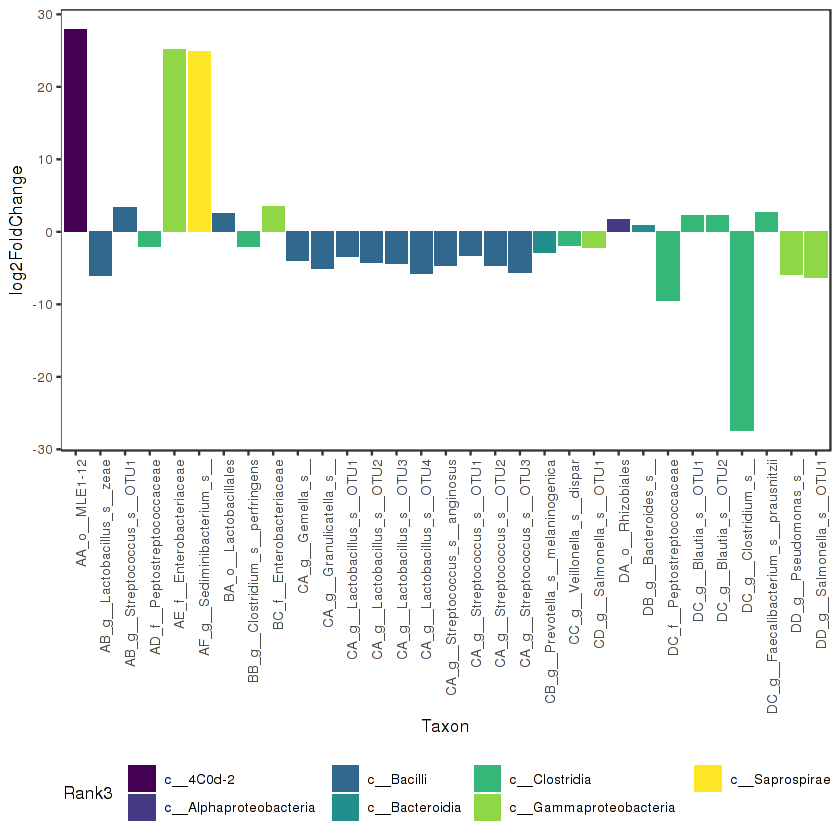

png 
  2

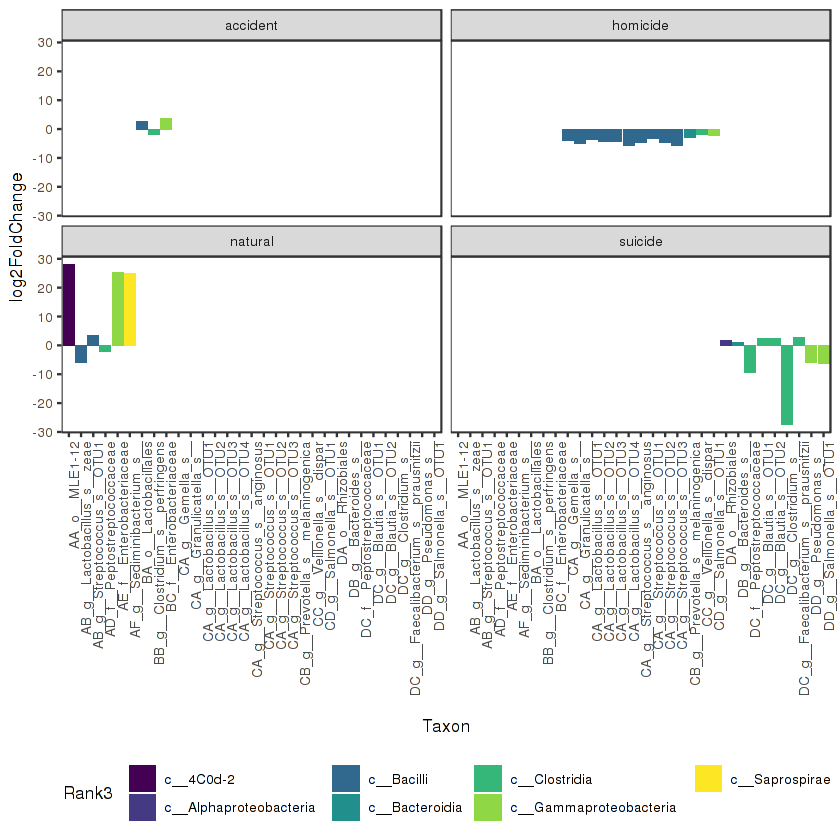

In [7]:
library(viridis)
p = ggplot(ancom_0.70.mod, aes(x = Taxon, y = log2FoldChange, fill=Rank3)) + geom_bar(stat="identity")

p = p + scale_fill_viridis(option="viridis", discrete=TRUE, direction=1)

p = p + theme_bw() + theme(text=element_text(size=10, color="black",family="Calibri"),
                           #legend.key = element_blank(),
                           axis.text.x = element_text(angle = 90, hjust = 1),
                           plot.title = element_text(hjust = 0.5),
                           legend.position = "bottom",
                           #axis.title.y=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())

p

p2 = p + facet_wrap(~MOD)
p2

png('MOD_ANCOM_log2foldchange_0.70.png', width=10, height=10, units='in', res=300)
plot(p)
dev.off()

##### ANCOM: raw code from Knight Lab

In [8]:
library(exactRankTests)
library(nlme)
library(ggplot2)

ancom.W = function(otu_data,var_data,
                   adjusted,repeated,
                   main.var,adj.formula,
                   repeat.var,long,rand.formula,
                   multcorr,sig){
  
  n_otu=dim(otu_data)[2]-1
  
  otu_ids=colnames(otu_data)[-1]
  
  if(repeated==F){
    data_comp=data.frame(merge(otu_data,var_data,by="Sample.ID",all.y=T),row.names=NULL)
    #data_comp=data.frame(merge(otu_data,var_data[,c("Sample.ID",main.var)],by="Sample.ID",all.y=T),row.names=NULL)
  }else if(repeated==T){
    data_comp=data.frame(merge(otu_data,var_data,by="Sample.ID"),row.names=NULL)
   # data_comp=data.frame(merge(otu_data,var_data[,c("Sample.ID",main.var,repeat.var)],by="Sample.ID"),row.names=NULL)
  }
  
  base.formula = paste0("lr ~ ",main.var)
  if(repeated==T){
    repeat.formula = paste0(base.formula," | ", repeat.var)
  }
  if(adjusted==T){
    adjusted.formula = paste0(base.formula," + ", adj.formula)
  }
  
  if( adjusted == F & repeated == F ){
    fformula  <- formula(base.formula)
  } else if( adjusted == F & repeated == T & long == T ){
    fformula  <- formula(base.formula)   
  }else if( adjusted == F & repeated == T & long == F ){
    fformula  <- formula(repeat.formula)   
  }else if( adjusted == T & repeated == F  ){
    fformula  <- formula(adjusted.formula)   
  }else if( adjusted == T & repeated == T  ){
    fformula  <- formula(adjusted.formula)   
  }else{
    stop("Problem with data. Dataset should contain OTU abundances, groups, 
         and optionally an ID for repeated measures.")
  }
  
  
  
    if( repeated==FALSE & adjusted == FALSE){
       if( length(unique(data_comp[,which(colnames(data_comp)==main.var)]))==2 ){
          tfun <- exactRankTests::wilcox.exact
       } else{
          tfun <- stats::kruskal.test
    }
    }else if( repeated==FALSE & adjusted == TRUE){
      tfun <- stats::aov
    }else if( repeated== TRUE & adjusted == FALSE & long == FALSE){
      tfun <- stats::friedman.test
    }else if( repeated== TRUE & adjusted == FALSE & long == TRUE){
      tfun <- nlme::lme
    }else if( repeated== TRUE & adjusted == TRUE){
      tfun <- nlme::lme
    }
  
  logratio.mat <- matrix(NA, nrow=n_otu, ncol=n_otu)
  for(ii in 1:(n_otu-1)){
    for(jj in (ii+1):n_otu){
      data.pair <- data_comp[,which(colnames(data_comp)%in%otu_ids[c(ii,jj)])]
      lr <- log((1+as.numeric(data.pair[,1]))/(1+as.numeric(data.pair[,2])))
      
      lr_dat <- data.frame( lr=lr, data_comp,row.names=NULL )
      
      if(adjusted==FALSE&repeated==FALSE){  ## Wilcox, Kruskal Wallis
        logratio.mat[ii,jj] <- tfun( formula=fformula, data = lr_dat)$p.value
      }else if(adjusted==FALSE&repeated==TRUE&long==FALSE){ ## Friedman's 
        logratio.mat[ii,jj] <- tfun( formula=fformula, data = lr_dat)$p.value
      }else if(adjusted==TRUE&repeated==FALSE){ ## ANOVA
        model=tfun(formula=fformula, data = lr_dat,na.action=na.omit)   
        picker=which(gsub(" ","",row.names(summary(model)[[1]]))==main.var)  
        logratio.mat[ii,jj] <- summary(model)[[1]][["Pr(>F)"]][picker]
      }else if(repeated==TRUE&long==TRUE){ ## GEE
        model=tfun(fixed=fformula,data = lr_dat,
                   random = formula(rand.formula),
                   correlation=corAR1(),
                   na.action=na.omit)   
        picker=which(gsub(" ","",row.names(anova(model)))==main.var)
        logratio.mat[ii,jj] <- anova(model)[["p-value"]][picker]
      }
      
    }
  } 
  
  ind <- lower.tri(logratio.mat)
  logratio.mat[ind] <- t(logratio.mat)[ind]
  
  
  logratio.mat[which(is.finite(logratio.mat)==FALSE)] <- 1
  
  mc.pval <- t(apply(logratio.mat,1,function(x){
    s <- p.adjust(x, method = "BH")
    return(s)
  }))
  
  a <- logratio.mat[upper.tri(logratio.mat,diag=FALSE)==TRUE]
  
  b <- matrix(0,ncol=n_otu,nrow=n_otu)
  b[upper.tri(b)==T] <- p.adjust(a, method = "BH")
  diag(b)  <- NA
  ind.1    <- lower.tri(b)
  b[ind.1] <- t(b)[ind.1]
  
  #########################################
  ### Code to extract surrogate p-value
  surr.pval <- apply(mc.pval,1,function(x){
    s0=quantile(x[which(as.numeric(as.character(x))<sig)],0.95)
    # s0=max(x[which(as.numeric(as.character(x))<alpha)])
    return(s0)
  })
  #########################################
  ### Conservative
  if(multcorr==1){
    W <- apply(b,1,function(x){
      subp <- length(which(x<sig))
    })
    ### Moderate
  } else if(multcorr==2){
    W <- apply(mc.pval,1,function(x){
      subp <- length(which(x<sig))
    })
    ### No correction
  } else if(multcorr==3){
    W <- apply(logratio.mat,1,function(x){
      subp <- length(which(x<sig))
    })
  }
  
  return(W)
  }



ANCOM.main = function(OTUdat,Vardat,
                      adjusted,repeated,
                      main.var,adj.formula,
                      repeat.var,longitudinal,
                      random.formula,
                      multcorr,sig,
                      prev.cut){
  
  p.zeroes=apply(OTUdat[,-1],2,function(x){
    s=length(which(x==0))/length(x)
  })
  
  zeroes.dist=data.frame(colnames(OTUdat)[-1],p.zeroes,row.names=NULL)
  colnames(zeroes.dist)=c("Taxon","Proportion_zero")
  
  zero.plot = ggplot(zeroes.dist, aes(x=Proportion_zero)) + 
              geom_histogram(binwidth=0.1,colour="black",fill="white") + 
              xlab("Proportion of zeroes") + ylab("Number of taxa") +
              theme_bw()
  
  #print(zero.plot)
  
  OTUdat.thinned=OTUdat
  OTUdat.thinned=OTUdat.thinned[,c(1,1+which(p.zeroes<prev.cut))]
  
  otu.names=colnames(OTUdat.thinned)[-1]
  
  W.detected   <- ancom.W(OTUdat.thinned,Vardat,
                          adjusted,repeated,
                          main.var,adj.formula,
                          repeat.var,longitudinal,random.formula,
                          multcorr,sig)
  
  W_stat       <- W.detected
  
  
  ### Bubble plot
  
  W_frame = data.frame(otu.names,W_stat,row.names=NULL)
  W_frame = W_frame[order(-W_frame$W_stat),]
  
  W_frame$detected_0.9=rep(FALSE,dim(W_frame)[1])
  W_frame$detected_0.8=rep(FALSE,dim(W_frame)[1])
  W_frame$detected_0.7=rep(FALSE,dim(W_frame)[1])
  W_frame$detected_0.6=rep(FALSE,dim(W_frame)[1])
  
  W_frame$detected_0.9[which(W_frame$W_stat>0.9*(dim(OTUdat.thinned[,-1])[2]-1))]=TRUE
  W_frame$detected_0.8[which(W_frame$W_stat>0.8*(dim(OTUdat.thinned[,-1])[2]-1))]=TRUE
  W_frame$detected_0.7[which(W_frame$W_stat>0.7*(dim(OTUdat.thinned[,-1])[2]-1))]=TRUE
  W_frame$detected_0.6[which(W_frame$W_stat>0.6*(dim(OTUdat.thinned[,-1])[2]-1))]=TRUE
  
  final_results=list(W_frame,zero.plot)
  names(final_results)=c("W.taxa","PLot.zeroes")
  return(final_results)
    }

 Package ‘exactRankTests’ is no longer under development.
 Please consider using package ‘coin’ instead.


Attaching package: ‘nlme’

The following object is masked from ‘package:dplyr’:

    collapse

